In [302]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from operator import itemgetter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [303]:
data = pd.read_csv("data.csv")
data1 = data
data.head()


,title,description,rating,year,tags,cover
0,Salad Days (Tang LiuZang) - Part 2,The second season of Salad Days (Tang LiuZang).,4.7,2021.0,"['BL', 'Manhua', 'Romance', 'Shounen-ai', 'Spo...",https://cdn.anime-planet.com/manga/primary/sal...
1,The Master of Diabolism,As the grandmaster who founded the Demonic Sec...,4.7,2017.0,"['Action', 'Adventure', 'BL', 'Comedy', 'Manhu...",https://cdn.anime-planet.com/manga/primary/the...
2,JoJo's Bizarre Adventure Part 7: Steel Ball Run,"Set in 1890, Steel Ball Run spotlights Gyro Ze...",4.7,2004.0,"['Action', 'Adventure', 'Horror', 'Mystery', '...",https://cdn.anime-planet.com/manga/primary/joj...
3,A Sign of Affection,"Yuki is a typical college student, whose world...",4.7,2019.0,"['Romance', 'Shoujo', 'Slice of Life', 'Disabi...",https://cdn.anime-planet.com/manga/primary/a-s...
4,Moriarty the Patriot,"Before he was Sherlock’s rival, Moriarty fough...",4.7,2016.0,"['Mystery', 'Shounen', 'Detectives', 'England'...",https://cdn.anime-planet.com/manga/primary/mor...


In [304]:
print("Number of rows in the dataset:", data.shape[0])
print("Number of columns in the dataset:", data.shape[1])
print("There are {} unique manhwa/manga available".format(len(data["title"].unique())))

Number of rows in the dataset: 70948
Number of columns in the dataset: 6
There are 70939 unique manhwa/manga available


In [305]:
useful_data = data.drop(columns=["cover"])
useful_data = useful_data[useful_data["year"] >= 2000]
useful_data = useful_data.sort_values("year")
useful_data = useful_data.dropna(subset=['rating'])
print(useful_data.head())
print("Number of rows in the dataset:", data.shape[0])
print("Number of columns in the dataset:", data.shape[1])

                         title  \
13421  Ghost Talker's Daydream   
21505                Brigadoon   
1505    Tobaku Hakairoku Kaiji   
4879            Momoten Musume   
26752           Angel's Coffin   

                                             description  rating    year  \
13421  The life of a spiritual medium is not an easy ...     3.9  2000.0   
21505  The year is 1969, and strange things are happe...     3.5  2000.0   
1505   After Kaiji's showdown with Chairman Hyoudo at...     4.4  2000.0   
4879   Hikaru doesn't excel in school or is an 'ideal...     4.2  2000.0   
26752  The once powerful god Seto has been sealed awa...     3.3  2000.0   

                                                    tags  
13421  ['Drama', 'Horror', 'Mystery', 'Shounen', 'BDS...  
21505  ['Action', 'Adventure', 'Comedy', 'Drama', 'Ro...  
1505   ['Seinen', 'Debt', 'Gambling', 'High Stakes Ga...  
4879   ['One Shot', 'Romance', 'Shoujo', 'School Life...  
26752  ['Drama', 'Romance', 'Shoujo', 'Demo

In [306]:
tag_column = useful_data["tags"]

for index,row in useful_data["tags"].iteritems():
    row = row[1:-1]
    row = row.replace("'", "").replace(" ", "")
    row = row.split(",")
    useful_data.at[index,"tags"] = row
    


weed = {}
for tag in useful_data["tags"]:
     for genre in tag:
        if (genre in weed):
            weed[genre] = weed[genre] + 1
        else:
            weed[genre] = 1
       

    
print(len(weed.keys()))
print(weed)

            

            

568
{'Drama': 9744, 'Horror': 933, 'Mystery': 1362, 'Shounen': 3277, 'BDSM': 141, 'Fetish': 257, 'GhostHunters': 5, 'Supernatural': 3956, 'AdaptedtoAnime': 1355, 'Action': 5231, 'Adventure': 2670, 'Comedy': 9240, 'Romance': 14030, 'SciFi': 1442, 'Historical': 1319, 'BasedonanAnime': 284, 'Seinen': 3086, 'Debt': 155, 'Gambling': 22, 'HighStakesGames': 130, 'MindGames': 15, 'Psychological': 1300, 'PVE': 12, 'PVP': 51, 'Thriller': 87, 'OneShot': 2635, 'Shoujo': 3818, 'SchoolLife': 6663, 'Tutors': 77, 'Demons': 752, 'God-HumanRelationship': 68, 'Gods': 143, 'InterspeciesRelationship': 648, 'Non-HumanProtagonists': 1316, 'Ecchi': 1682, 'Fantasy': 6710, 'Medieval': 153, 'ExplicitViolence': 421, 'Harem': 892, 'LightNovels': 861, 'ContemporaryFantasy': 135, 'DemonKing': 145, 'Isekai': 1103, 'LifestyleChange': 179, 'PersoninaStrangeWorld': 1825, 'Royalty': 859, 'SummonedIntoAnotherWorld': 195, 'Amnesia': 151, 'Island': 169, 'Ocean': 46, 'ScubaDiving': 7, 'Cyberpunk': 15, 'Cyborgs': 29, 'Dystopi

In [307]:
N = 50
 
# N largest values in dictionary
# Using sorted() + itemgetter() + items()
weed = dict(sorted(weed.items(), key=itemgetter(1), reverse=True)[:N])
 
# printing result
print("The top N value pairs are " + str(weed))


The top N value pairs are {'Romance': 14030, 'Drama': 9744, 'Comedy': 9240, 'BL': 7412, 'Fantasy': 6710, 'SchoolLife': 6663, 'FullColor': 6299, 'Yaoi': 5942, 'Webtoons': 5859, 'Action': 5231, 'Manhwa': 4529, 'Supernatural': 3956, 'Shoujo': 3818, 'Shounen': 3277, 'SliceofLife': 3247, 'Seinen': 3086, 'Manhua': 2706, 'ExplicitSex': 2675, 'Adventure': 2670, 'OneShot': 2635, 'AdultCouples': 2133, 'PersoninaStrangeWorld': 1825, 'MatureThemes': 1684, 'Ecchi': 1682, 'Collections': 1654, 'MatureRomance': 1547, 'Shounen-ai': 1470, 'SciFi': 1442, 'BasedonaWebNovel': 1411, 'Mystery': 1362, 'BasedonaLightNovel': 1357, 'AdaptedtoAnime': 1355, 'Josei': 1339, 'Historical': 1319, 'Non-HumanProtagonists': 1316, 'Psychological': 1300, 'GL': 1192, 'Isekai': 1103, 'Magic': 1038, 'PhysicalAbuse': 951, 'Horror': 933, 'Harem': 892, 'LightNovels': 861, 'Royalty': 859, 'Shoujo-ai': 802, 'SexualAbuse': 778, 'ChildhoodFriends': 763, 'Smut': 760, 'Demons': 752, 'Reincarnation': 733}


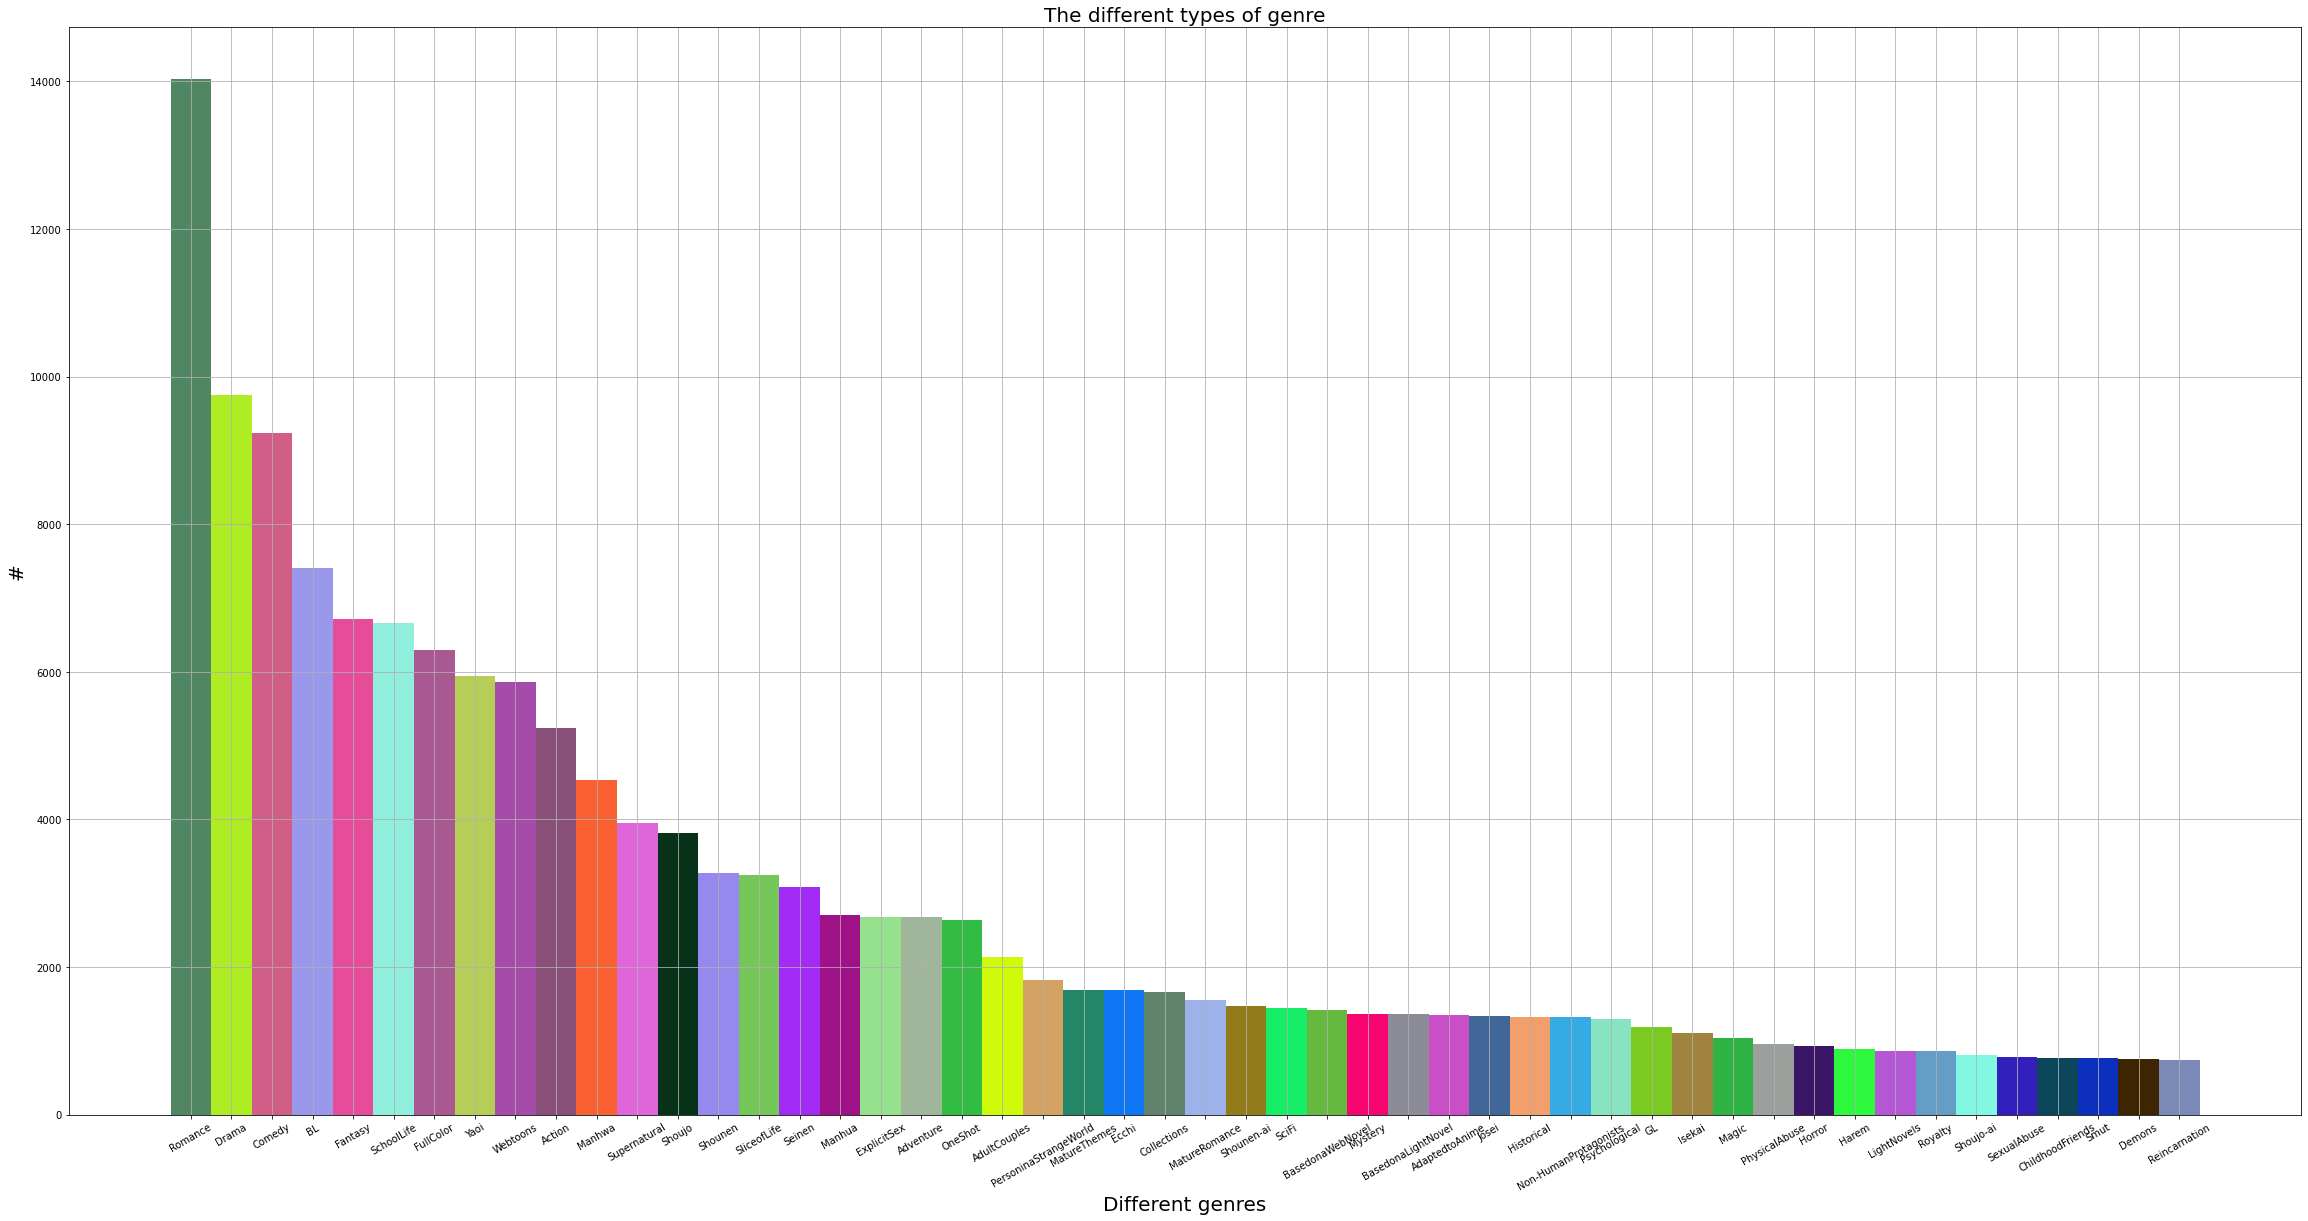

In [308]:


values_list = list(weed.values())

values_array = np.array(values_list)

keys_list = list(weed.keys())

keys_array = np.array(keys_list)


no_of_colors=len(keys_array)
color=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])
       for j in range(no_of_colors)]


bar_plot = pd.DataFrame({"tags":values_array},index = keys_array)
#bar_plot.plot.bar()


colors = color
plt.figure(figsize=(40, 20))
plt.bar(keys_array, values_array, color=colors,width = 1)
plt.xticks(rotation=30)
plt.title('The different types of genre', fontsize=20)
plt.xlabel('Different genres', fontsize=20)
plt.ylabel('#', fontsize=20)
plt.grid(True)
plt.show()

In [309]:
#KNN model

ohctags = {}

for tags in useful_data["tags"]:
    #splt = row[1:-1]
    #splt = row.replace("'", "").replace(" ", "")
    splt = tags
    for wtag in weed.keys():
        if (wtag not in ohctags.keys()):
            ohctags[wtag] = []
        if (wtag in splt):
            ohctags[wtag].append(1)
        else:
            ohctags[wtag].append(0)
            
#print(len(useful_data))   
#print(ohctags["Romance"])

ohctags_df = pd.DataFrame.from_dict(ohctags)
ohctags_df.head()



,Romance,Drama,Comedy,BL,Fantasy,SchoolLife,FullColor,Yaoi,Webtoons,Action,...,Horror,Harem,LightNovels,Royalty,Shoujo-ai,SexualAbuse,ChildhoodFriends,Smut,Demons,Reincarnation
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [310]:
#combine both into one dataframe!

prep_df = useful_data
#prep_df = prep_df.reset_index()
prep_df = pd.concat([useful_data.reset_index(drop=True), ohctags_df.reset_index(drop=True)], axis=1)
prep_df.head(10)

,title,description,rating,year,tags,Romance,Drama,Comedy,BL,Fantasy,...,Horror,Harem,LightNovels,Royalty,Shoujo-ai,SexualAbuse,ChildhoodFriends,Smut,Demons,Reincarnation
0,Ghost Talker's Daydream,The life of a spiritual medium is not an easy ...,3.9,2000.0,"[Drama, Horror, Mystery, Shounen, BDSM, Fetish...",0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Brigadoon,"The year is 1969, and strange things are happe...",3.5,2000.0,"[Action, Adventure, Comedy, Drama, Romance, Sc...",1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Tobaku Hakairoku Kaiji,After Kaiji's showdown with Chairman Hyoudo at...,4.4,2000.0,"[Seinen, Debt, Gambling, HighStakesGames, Mind...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Momoten Musume,Hikaru doesn't excel in school or is an 'ideal...,4.2,2000.0,"[OneShot, Romance, Shoujo, SchoolLife, Tutors]",1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Angel's Coffin,The once powerful god Seto has been sealed awa...,3.3,2000.0,"[Drama, Romance, Shoujo, Demons, God-HumanRela...",1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,Sword of the Dark Ones,"In the late-medieval land of Barnard, between ...",3.5,2000.0,"[Action, Adventure, Ecchi, Fantasy, Shounen, M...",0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,Kyou kara Ma no Tsuku Jiyuugyou! (Light Novel),Shibuya Yuuri was a typical fifteen-year-old b...,4.1,2000.0,"[Fantasy, Harem, LightNovels, ContemporaryFant...",0,0,0,0,1,...,0,1,1,1,0,0,0,0,0,0
7,IO (Minato KOYO),Nakabaru Taiyo came to Okinawa in the pursuit ...,3.9,2000.0,"[Drama, Ecchi, Mystery, Romance, Seinen, Amnes...",1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Battle Angel Alita: Last Order,"How do you define ""human""? That is a question ...",4.4,2000.0,"[Action, SciFi, Seinen, Cyberpunk, Cyborgs, Dy...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Battle Vixens,"Centuries ago, in China's Three Kingdoms Perio...",3.6,2000.0,"[Action, Comedy, Drama, Ecchi, Seinen, Martial...",0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [311]:
from sklearn.neighbors import NearestNeighbors

# get all the features by themselves as a numpy array
#X = (prep_df.drop(["index", "title", "description", "rating", "year", "tags"], axis=1)).to_numpy()
X = ohctags_df.to_numpy()

# implement knn using scipi
# ball tree is to make sure we dont calculate 67,000 distances 
knn = NearestNeighbors(n_neighbors=11, algorithm='ball_tree')
nbrs = knn.fit(X)

In [312]:
def cleansample(r):
    return (r.drop(["index", "title", "description", "rating", "year", "tags"], axis=1)).to_numpy()

#grab random sample, as well as the one hot encoded samples of it.
rand = prep_df.sample()
Y = (rand.drop(["title", "description", "rating", "year", "tags"], axis=1)).to_numpy()


# find distances and go for it


#Y is the series
def knnrecs(Y):
    Ydat = (Y.drop(labels=["title", "description", "rating", "year", "tags"])).to_numpy()
    distances, indices = nbrs.kneighbors([Ydat])
    #print(indices)
    print("Best Reccomendations if You've Read: " + str(Y["title"]))
    print(str(Y["tags"]))
    print()
    i = 0
    for x in indices[0]:
        row = useful_data.iloc[x]
        title = row["title"]
        desc = row["description"]
        tags = row["tags"]
        if (title != Y["title"] and i != 10):
            print(str(title) + ": " + str(desc))
            print(distances[0][i])
            #print(str(title))
            #print(str(tags))
            print()
        i += 1

#knnrecs(Y)

In [313]:
dsid = prep_df.index[prep_df["title"] == "Oshi no Ko"]
#print(dsid)
Y = prep_df.iloc[dsid[0]]
#print(type(Y))

knnrecs(Y)

Best Reccomendations if You've Read: Oshi no Ko
['Drama', 'Seinen', 'SliceofLife', 'Acting', 'Idols', 'Psychological', 'Reincarnation', 'Showbiz', 'Siblings', 'SocialMedia', 'Bullying', 'EmotionalAbuse', 'MatureThemes', 'Suicide', 'Violence']

Hikari no Machi (Inio ASANO): The sun rays enter the city of light, as various stories unfold:Bright, dark and harsh; a story filled with people from whom you’d want to avert your eyes. Yet, it is close to reality; so maybe it’s true to humanity. Like an old bond between a boy and a girl, a friendship is born between girls who rarely speak to each other.A man who dirties his hands for money, and the girlfriend who waits for him to come home.
1.0

Deep Love: Real: The man whose eyes are re-awakening, Yoshiyuki. At the age of 18 years old he lives a life of hopelessness, and thus visits the host club Platinum in Shibuya. They all thought it: “Yoshiyuki wouldn’t be suited to a become a host.” At that time, only the number one host Taku looked into h

/Users/eric/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [314]:
#Small smaple size of Fantasy + randomized like and dislike

random_seed = 615
np.random.seed(2129)

small_data_size = useful_data
target = "Fantasy"
small_data_size['contains_target'] = small_data_size['tags'].apply(lambda arr: target in arr)

# filter the DataFrame based on the boolean column
filtered_df = small_data_size[small_data_size['contains_target']]

# print the filtered DataFrame
filtered_df = filtered_df.sample(n=50, random_state=random_seed)
filtered_df['Like_Dislike'] = np.random.randint(0, 2, filtered_df.shape[0])
filtered_df
#test1= list(filter(lambda x: 'Fantasy' in x, small_data_size["tags"]))
#small_data_size = small_data_size[for x in test1: if]
#mask = np.array([any(element in test1[1] for element in test1) for row in small_data_size])
#mask
#test1 = small_data_size[mask]

,title,description,rating,year,tags,contains_target,Like_Dislike
25607,The Era of Female Doctor,Still reeling from the fact that her plane jus...,3.3,2017.0,"[Comedy, Drama, Fantasy, Manhua, Romance, Anci...",True,1
8438,Disobey the Duke if You Dare,"After her second husband's death, Lily is forc...",4.1,2022.0,"[Drama, Fantasy, Manhwa, Romance, Webtoons, Fu...",True,1
19612,"'Tis Time for ""Torture,"" Princess","A princess held captive, subjected to merciles...",3.6,2019.0,"[Comedy, Fantasy, Shounen, Demons, FoodandBeve...",True,0
13883,Gogo Monster,Third grader Yuki Tachibana lives in two world...,3.8,2000.0,"[Drama, Fantasy, Seinen, Psychological, School...",True,0
3513,The Ideal Sponger Life (Light Novel),Yamai Zenjirou is your everyday office worker ...,4.3,2012.0,"[Adventure, Comedy, Drama, Fantasy, LightNovel...",True,0
3029,Raise a Mink as My Wife,A lovely spirit animal from heaven is forced t...,4.3,2020.0,"[Comedy, Fantasy, Manhua, Romance, Webtoons, F...",True,1
12911,A Strange & Mystifying Story,Akio Yamane’s bloodline is cursed! Or at least...,3.9,2005.0,"[BL, Drama, Fantasy, Romance, Yaoi, AdultCoupl...",True,1
10617,Star Ocean: Blue Sphere,"Galactic Era 366, a malevolent entity, ""The Te...",4.0,2002.0,"[Action, Adventure, Fantasy, SciFi, BasedonaVi...",True,1
20379,Paladin,"The country of Greenland, after losing the war...",3.6,2011.0,"[Action, Adventure, Fantasy, Manhwa, Webtoons,...",True,0
25225,Grimm no You na Monogatari: Snow White,Morohoshi Daijirou's take on the Grimm Fairy T...,3.3,2003.0,"[Fantasy, Mystery, Seinen, Psychological, Supe...",True,1


In [315]:
X = ohctags_df.to_numpy()

# train model with ~30
knn = NearestNeighbors(n_neighbors=30, algorithm='ball_tree')
nbrs = knn.fit(X)

dsid = prep_df.index[prep_df["title"] == "The Eminence in Shadow"]
#print(dsid)
Y = prep_df.iloc[dsid[0]]


#get distances
Ydat = (Y.drop(labels=["title", "description", "tags", "rating", "year"])).to_numpy()

distances, indices = nbrs.kneighbors([Ydat])

# sample reading list of those people that read eminience of shadow.


sampleidx = indices[0]
ld = np.ones(len(sampleidx))

random_seed = 615
np.random.seed(2129)

#for i in range(0,20)
i = 0
while (i < 30):
    r = np.random.randint(len(prep_df))
    if (r not in sampleidx):
        sampleidx = np.append(sampleidx, r)
        ld = np.append(ld, 0)
        i += 1


sample = prep_df.iloc[sampleidx]
sample["Like_Dislike"] = ld
sample.head()

/Users/eric/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/var/folders/bq/jq080xl54ng82rb93lm30q9w0000gn/T/ipykernel_36483/467160915.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample["Like_Dislike"] = ld


,title,description,rating,year,tags,Romance,Drama,Comedy,BL,Fantasy,...,Harem,LightNovels,Royalty,Shoujo-ai,SexualAbuse,ChildhoodFriends,Smut,Demons,Reincarnation,Like_Dislike
19193,The Eminence in Shadow,"Shadowbrokers are those who go unnoticed, posi...",4.6,2018.0,"[Action, Comedy, Fantasy, Shounen, Isekai, Mag...",0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1.0
21545,Villainess: Reloaded! Blowing Away Bad Ends wi...,Astrid von Oldenburg is no ordinary four-year-...,3.8,2019.0,"[Action, Comedy, Fantasy, Shounen, Guns, Iseka...",0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1.0
20244,"Doryoku Shisugita Sekai Saikyou no Butouka wa,...","One day, a martial artist named Ash was sudden...",3.3,2018.0,"[Action, Comedy, Fantasy, Shounen, Isekai, Mag...",0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1.0
16812,Didn't I Say to Make My Abilities Average in t...,"When she turns ten years old, Adele von Ascham...",3.5,2016.0,"[Action, Adventure, Comedy, Fantasy, Shounen, ...",0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1.0
13773,Tsukimichi: Moonlit Fantasy,Misumi Makoto was just a normal high-school st...,4.5,2015.0,"[Action, Adventure, Comedy, Fantasy, Shounen, ...",0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1.0


In [316]:
#Decision Tree
from sklearn import metrics


X = (sample.drop(labels=["title", "description", "tags", "rating", "year","Like_Dislike"], axis=1)).to_numpy()
y = (sample["Like_Dislike"]).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7, random_state=1, shuffle=True)




# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cv_scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Accuracy: 1.0
Cross-validation scores: [1.         1.         0.83333333 1.         1.        ]
Mean CV accuracy: 0.9666666666666668


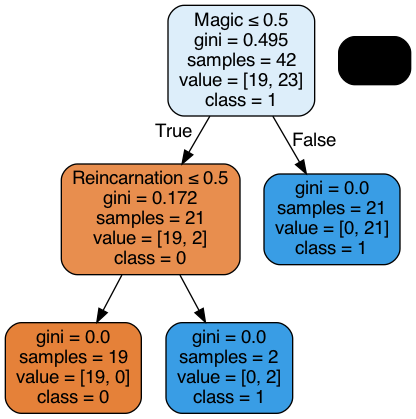

In [318]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from six import StringIO

dot_data = StringIO()
feature_cols = sample.drop(labels=["title", "description", "tags", "rating", "year","Like_Dislike"], axis=1).columns.tolist()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('manhwa.png')
Image(graph.create_png())

In [327]:
target = "Manhwa"
small_data_size['contains_target'] = small_data_size['tags'].apply(lambda arr: target in arr)

# filter the DataFrame based on the boolean column
filtered_df = small_data_size[small_data_size['contains_target']]
filtered_df = filtered_df[filtered_df["rating"] >= 4.6]
filtered_df = filtered_df.sample(n=50, random_state=21)


filtered_df

,title,description,rating,year,tags,contains_target
28,Nano Machine,After being held in disdain and having his lif...,4.7,2020.0,"[Action, Adventure, Fantasy, Manhwa, SciFi, We...",True
335,Study Group - Part 2,The second season of Study Group.,4.6,2021.0,"[Action, Manhwa, Webtoons, FullColor, SchoolLife]",True
46,Heesu in Class 2,"Heesu’s world revolves around Chanyoung, his b...",4.6,2017.0,"[BL, Manhwa, Romance, Shounen-ai, Webtoons, Ch...",True
10,Tower of God - Part 3,The third season of Tower of God.,4.7,2019.0,"[Action, Adventure, Drama, Fantasy, Manhwa, We...",True
17,Teenage Mercenary,"At the age of eight, Ijin Yu lost his parents ...",4.7,2020.0,"[Action, Drama, Manhwa, Webtoons, FullColor, L...",True
287,Ghost Teller,You think your ghost stories are scary? Try li...,4.6,2017.0,"[Horror, Manhwa, Mystery, Webtoons, FullColor,...",True
12,Bastard,Jin has lived a tough life. One of his oldest ...,4.7,2014.0,"[Drama, Horror, Manhwa, Romance, Webtoons, Cri...",True
186,Under the Oak Tree (Novel),A flawless love story of the flawed. Stutterin...,4.6,2017.0,"[Drama, Fantasy, Manhwa, Romance, WebNovels, H...",True
192,Surviving Romance,When Chaerin Eun becomes the protagonist of th...,4.6,2021.0,"[Horror, Manhwa, Romance, Webtoons, FullColor,...",True
299,"I’m Only a Stepmother, But My Daughter is Just...",I managed to get myself thrown into a story as...,4.6,2019.0,"[Comedy, Fantasy, Manhwa, Romance, WebNovels, ...",True


In [333]:
import re


manhwa_data = []
manhwa_data.append(prep_df.index[prep_df["title"] == "Nano Machine"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Tower of God - Part 3"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "A Good Day to be a Dog"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Tower of God"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "A Business Proposal"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Positively Yours"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "What's Wrong with Secretary Kim?"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Hold Me Tight"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Weak Hero"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Bastard"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Teenage Mercenary"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Surviving Romance"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Homeless"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Walk on Water"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Second Life Ranker (Novel)"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Light and Shadow"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Odd Girl Out"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Love Shuttle"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Sweet Home"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Positively Yours"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Unholy Blood"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Medical Return"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Who Made Me a Princess"][0])

ld = np.ones(len(manhwa_data))

random_seed = 615
np.random.seed(2193)


for i in range(35):
    ran = np.random.randint(len(prep_df))
    if(ran not in sampleidx):
        manhwa_data = np.append(manhwa_data,ran)
        ld = np.append(ld,0)
        
sksample = prep_df.iloc[manhwa_data]
sksample["Like_Dislike"]=ld
sksample.head()

/var/folders/bq/jq080xl54ng82rb93lm30q9w0000gn/T/ipykernel_36483/4102895692.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sksample["Like_Dislike"]=ld


,title,description,rating,year,tags,Romance,Drama,Comedy,BL,Fantasy,...,Harem,LightNovels,Royalty,Shoujo-ai,SexualAbuse,ChildhoodFriends,Smut,Demons,Reincarnation,Like_Dislike
25456,Nano Machine,After being held in disdain and having his lif...,4.7,2020.0,"[Action, Adventure, Fantasy, Manhwa, SciFi, We...",0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
23024,Tower of God - Part 3,The third season of Tower of God.,4.7,2019.0,"[Action, Adventure, Drama, Fantasy, Manhwa, We...",0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
18655,A Good Day to be a Dog,"Hana is cursed into a dog from her first kiss,...",4.6,2017.0,"[Comedy, Drama, Manhwa, Romance, Webtoons, Adu...",1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
8267,Tower of God,Fame. Glory. Power. Anything in your wildest d...,4.6,2010.0,"[Action, Adventure, Drama, Fantasy, Manhwa, We...",0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
19239,A Business Proposal,Ha-ri made a deal—go on one blind date for her...,4.6,2018.0,"[Comedy, Drama, Manhwa, Romance, Webtoons, Adu...",1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
